### Mounting Google Drive

This code cell mounts Google Drive to the Colab environment. Mounting Google Drive allows to access files and directories stored in Google Drive directly from Colab notebook.

- **`from google.colab import drive`**: This line imports the necessary module from the `google.colab` package to mount Google Drive.

- **`drive.mount("/content/drive")`**: This command mounts Google Drive to the Colab runtime. When run this cell, it'll be prompted to authenticate and authorize access to Google Drive. Once mounted, Google Drive will be accessible under the `/content/drive` directory in the Colab environment.

Mounting Google Drive is useful for accessing datasets, scripts, or other files stored in Google Drive and incorporating them into Colab notebook workflow.


In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Importing Libraries and Suppressing Warnings

This cell imports necessary libraries for data analysis and time series forecasting, and suppresses warnings to maintain a clean notebook environment.

### Libraries Imported:
- `pandas`: Used for data manipulation and analysis.
- `numpy`: Provides support for mathematical functions and arrays.
- `matplotlib.pyplot`: A plotting library for creating visualizations.
- `datetime`: Provides classes for working with dates and times.
- `warnings`: Used to manage warnings, and `filterwarnings('ignore')` suppresses any warning messages.
- `itertools`: Provides functions for creating iterators.
- `statsmodels.tsa.stattools`: Contains tools for time series analysis, such as the Augmented Dickey-Fuller test for stationarity.
- `sys`: Provides access to some variables used or maintained by the Python interpreter.
- `calendar`: Provides functions related to the calendar, such as getting month names.

### Magic Command:
- `%matplotlib inline`: Allows matplotlib plots to be displayed directly in the Jupyter Notebook.

This setup ensures that all necessary libraries are imported and warnings are suppressed, preparing the environment for further data analysis and visualization.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import itertools
from statsmodels.tsa.stattools import adfuller
import sys
import calendar
import statsmodels.api as sm

### Reading Data from CSV File

This cell reads data from a CSV file located at '/content/drive/MyDrive/AA-BOS.csv' and displays its shape.

### Steps:
1. Read Data from CSV: The `pd.read_csv()` function is used to read the data from the CSV file into a pandas DataFrame.
2. Check Data Shape: The `shape` attribute of the DataFrame is used to display the number of rows and columns in the dataset.

### Note:
- Make sure to replace '/content/drive/MyDrive/AA-BOS.csv' with the correct path to your CSV file.


In [3]:
# Read data from CSV
data = pd.read_csv('/content/drive/MyDrive/AA-BOS.csv')
data.shape

(174, 5)

In [4]:
data.head()

,Date,Flights_Domestic,Flights_International,Passengers_Domestic,Passengers_International
0,2002/10/01,1500,143.0,158879,20535.0
1,2002/11/01,1375,95.0,133940,15244.0
2,2002/12/01,1404,94.0,160942,16236.0
3,2003/01/01,1384,96.0,127975,13528.0
4,2003/02/01,1178,84.0,132958,13314.0


### Calculating Total Passengers

This cell calculates the total number of passengers by summing the counts of domestic and international passengers. It selects two columns, 'Passengers_Domestic' and 'Passengers_International', from the DataFrame `data` and adds their values together. The result is stored in a new column named 'passengers'.

Ensure that the columns 'Passengers_Domestic' and 'Passengers_International' exist in the DataFrame `data`, and that their data types are numeric as they are being summed.


In [5]:
data['passengers'] = data['Passengers_Domestic'] + data['Passengers_International']

### Explanation for Summing Domestic and International Passengers

The decision to sum the counts of domestic and international passengers is likely motivated by the need to analyze the total passenger traffic, regardless of whether it's domestic or international. By combining these counts into a single total, it becomes easier to understand overall passenger trends and to perform aggregate analysis on passenger data.

Additionally, combining domestic and international passengers simplifies data management and analysis. Instead of dealing with two separate variables, analysts can work with a single aggregate measure, reducing complexity and potentially improving the efficiency of data processing and modeling.



### Handling Missing Data
In this cell, the code assigns the mean value of the 'passengers' column to missing values within the same column using the `fillna()` function in Python. This means that any NaN (Not a Number) values in the 'passengers' column will be replaced with the average number of passengers across all observations in the dataset. This is a common technique used to handle missing data by imputing it with a measure of central tendency, such as the mean. This ensures that the dataset remains consistent for analysis and modeling purposes.


In [6]:
data['passenger'] = data['passengers'].fillna(data['passengers'].mean())

In [12]:
passenger = data[['Date', 'passenger']]
passenger.head()

,Date,passenger
0,2002/10/01,179414.0
1,2002/11/01,149184.0
2,2002/12/01,177178.0
3,2003/01/01,141503.0
4,2003/02/01,146272.0


### Extracting Month and Year from Dates

This code generates a sequence of datetime objects starting from October 1, 2002, with a monthly frequency (`freq='MS'`) and a length corresponding to the number of records in the 'passenger' DataFrame. Then, it extracts the month and year from each date and assigns them to new columns 'Month' and 'Year' respectively in the 'passenger' DataFrame. This allows for convenient analysis and visualization of the data based on monthly and yearly trends.


In [19]:
dates = pd.date_range(start='2002-10-01', freq='MS',periods=len(passenger))
passenger['Month'] = dates.month
passenger['Year'] = dates.year
passenger.head()

,Date,passenger,Month,Year
0,2002/10/01,179414.0,10,2002
1,2002/11/01,149184.0,11,2002
2,2002/12/01,177178.0,12,2002
3,2003/01/01,141503.0,1,2003
4,2003/02/01,146272.0,2,2003


### Data Refinement

This code refines the 'passenger' DataFrame by renaming the 'passenger' column to 'Passengers' for clarity. It then converts the numerical representation of months to their abbreviated form (e.g., 1 to 'Jan', 2 to 'Feb') using the `calendar.month_abbr` function and applies it to the 'Month' column. Finally, it reorders the DataFrame columns to 'Month', 'Year', and 'Passengers' for better readability and ease of analysis. These transformations enhance the presentation and usability of the data for further exploration and visualization.


In [20]:
passenger['Month'] = passenger['Month'].apply(lambda x: calendar.month_abbr[x])
passenger.rename({'passenger':'Passengers'},axis=1,inplace=True)
passenger = passenger[['Month','Year','Passengers']]
passenger.head()

,Month,Year,Passengers
0,Oct,2002,179414.0
1,Nov,2002,149184.0
2,Dec,2002,177178.0
3,Jan,2003,141503.0
4,Feb,2003,146272.0


### Setting Date as Index

This code enhances the 'passenger' DataFrame by adding a new 'Date' column containing the datetime objects generated earlier. It then sets the 'Date' column as the index of the DataFrame using `set_index()`. This allows for easier time-based operations and facilitates time-series analysis. By setting the date as the index, the DataFrame becomes more structured and optimized for time-dependent operations, such as trend analysis and forecasting.


In [21]:
passenger['Date'] = dates
passenger.set_index('Date',inplace=True)
passenger.head()

,Month,Year,Passengers
Date,,,
2002-10-01,Oct,2002,179414.0
2002-11-01,Nov,2002,149184.0
2002-12-01,Dec,2002,177178.0
2003-01-01,Jan,2003,141503.0
2003-02-01,Feb,2003,146272.0


### Visualizing Average Passengers per Year

This code creates a bar plot using Matplotlib to visualize the average number of passengers per year. It first groups the 'passenger' DataFrame by the 'Year' column and calculates the mean of the 'Passengers' column for each year. Then, it plots these average values as bars, with each bar representing a different year. The figsize parameter sets the size of the figure to (10, 8) for better visibility and clarity. This visualization provides insights into the yearly trends in passenger numbers, aiding in understanding patterns and identifying potential anomalies or changes over time.


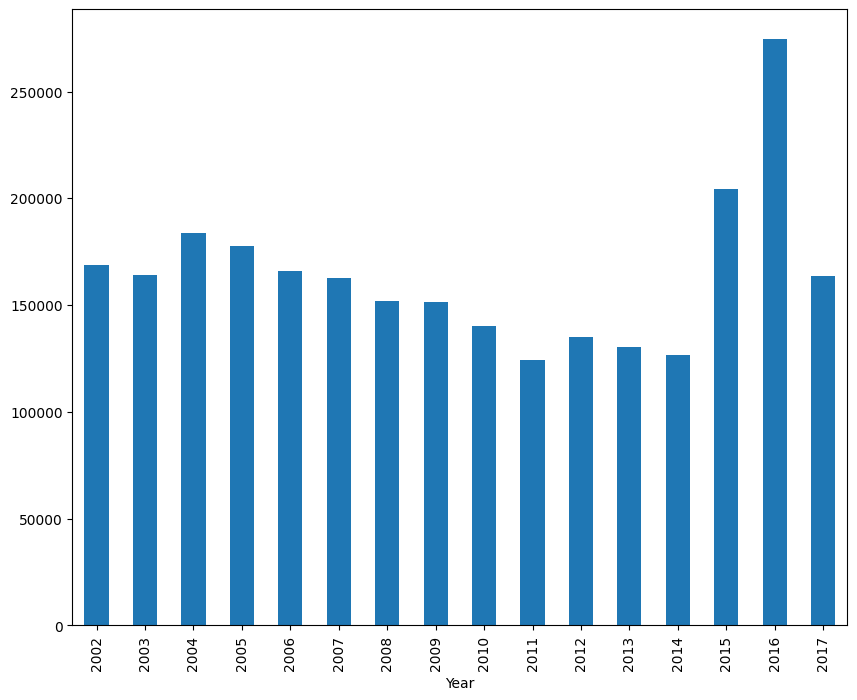

In [22]:
plt.figure(figsize=(10,8))
passenger.groupby('Year')['Passengers'].mean().plot(kind='bar')
plt.show()

The bar chart depicts the distribution of data points over a range of years from 2002 to 2017. Each bar represents the count of data points for a specific year. Observations show a generally stable trend from 2002 to 2009, with a noticeable dip around 2010-2013. The counts increase sharply in 2015 and peak in 2016, followed by a significant decrease in 2017.

### Visualizing Average Passengers per Month

This code generates a bar plot using Matplotlib to visualize the average number of passengers per month. It groups the 'passenger' DataFrame by the 'Month' column and calculates the mean of the 'Passengers' column for each month. The resulting averages are then plotted as bars, with each bar corresponding to a different month. The `reindex()` function is used to reorder the months according to their chronological order for better readability. The figsize parameter sets the size of the figure to (10, 8) for improved visibility. This visualization offers insights into seasonal patterns and fluctuations in passenger numbers throughout the year.


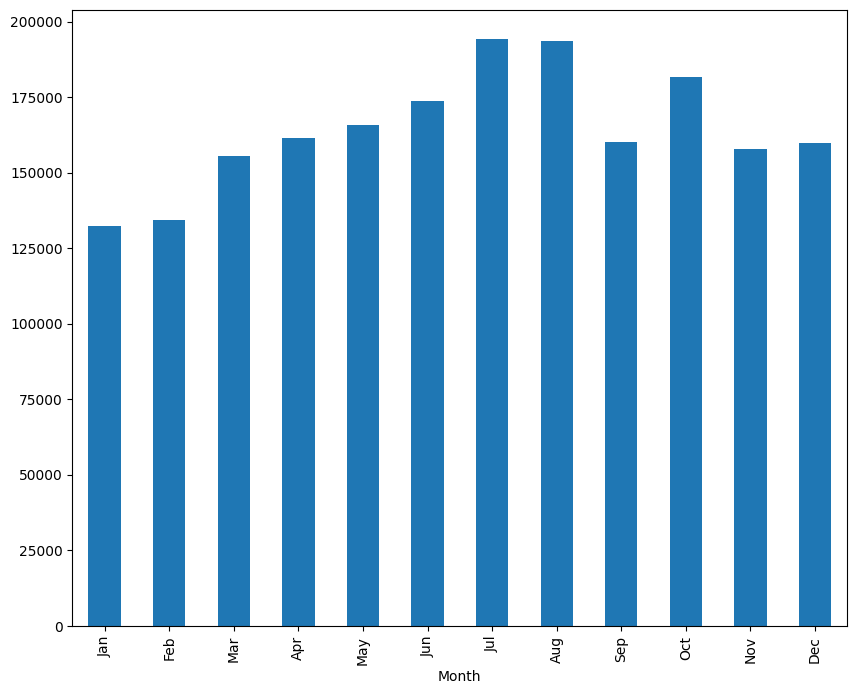

In [23]:
plt.figure(figsize=(10,8))
passenger.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')
plt.show()

From the above figure we can see that more passengers can be seen between months June to September.

### Visualizing Passenger Count Over Time

This code generates a line plot using Matplotlib to visualize the passenger count over time. It retrieves the 'Passengers' column from the 'passenger' DataFrame and assigns it to the variable 'passengers_count'. Then, it plots the passenger count as a line chart, with the x-axis representing the years and the y-axis representing the number of passengers. The `xlabel()` and `ylabel()` functions are used to label the x-axis as 'Year' and the y-axis as 'Number of Passengers' respectively, for better clarity. The figsize parameter sets the size of the figure to (10, 8) for improved visibility. This visualization helps in understanding the overall trend and fluctuations in passenger numbers over the entire time period.


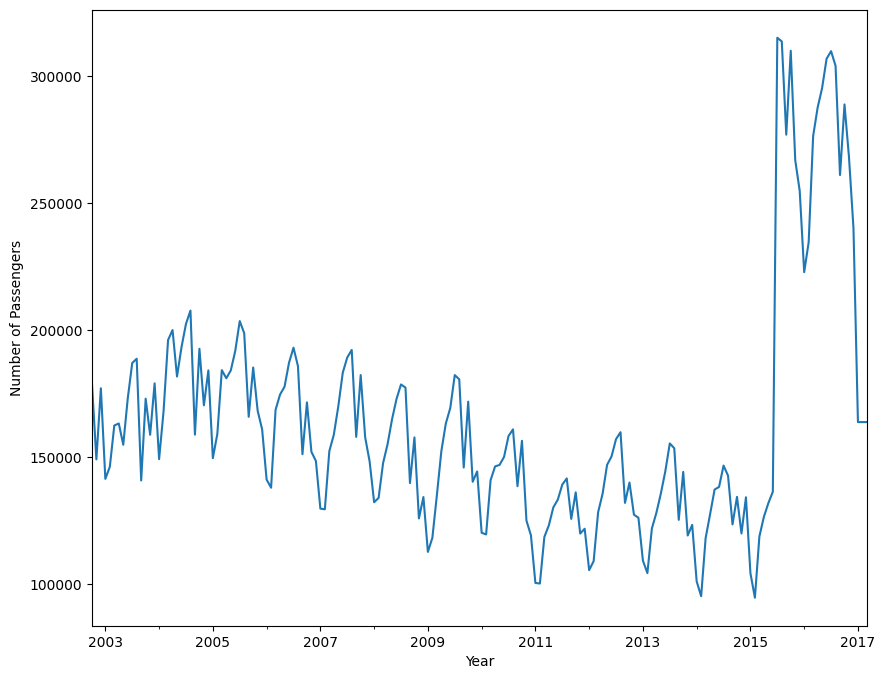

In [25]:
passengers_count = passenger['Passengers']
plt.figure(figsize=(10,8))
passengers_count.plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

### Time Series Decomposition

This code utilizes the `seasonal_decompose` function from the `statsmodels` library to decompose the time series of passenger counts into its constituent components: trend, seasonal, and residual. It employs a multiplicative model and allows for trend extrapolation using the `extrapolate_trend` parameter set to 8. The resulting decomposition is then visualized using Matplotlib. The `set_figheight()` and `set_figwidth()` methods adjust the dimensions of the figure to enhance readability, with the figure's height set to 10 and width to 8. Lastly, the `suptitle()` function sets the title of the figure to 'Decomposition of Time Series'. This analysis aids in understanding the underlying patterns and structures within the passenger count time series data.


Text(0.5, 0.98, 'Decomposition of Time Series')

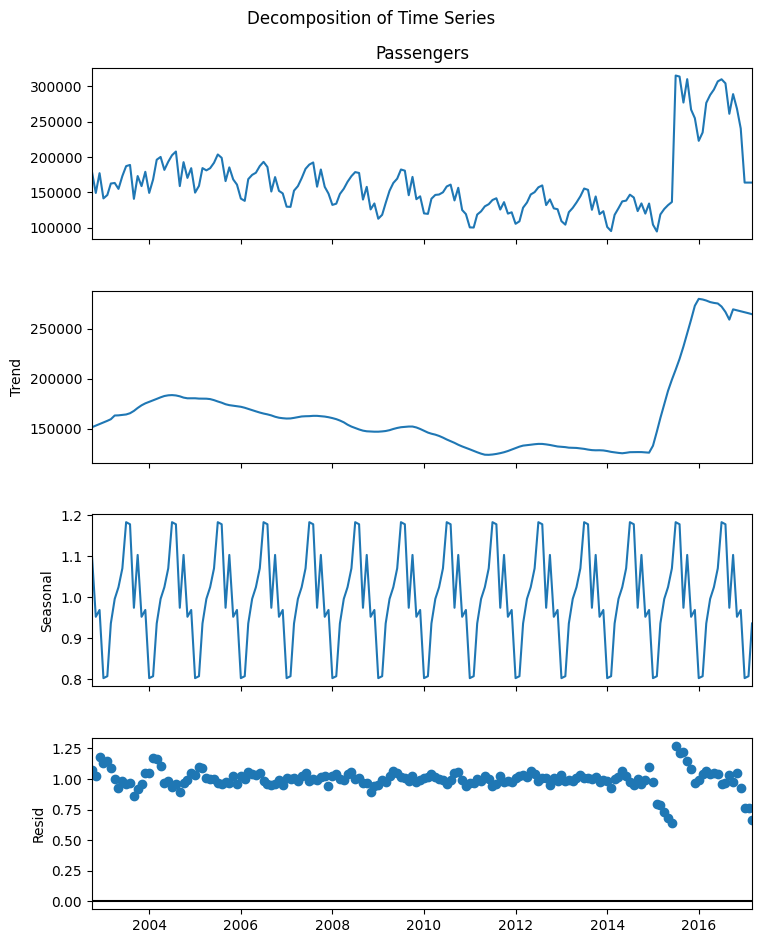

In [26]:
decompose = sm.tsa.seasonal_decompose(passengers_count,model='multiplicative',extrapolate_trend=8)
fig = decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle('Decomposition of Time Series')

### Rolling Mean Analysis

This code creates a subplot with two vertically arranged plots using Matplotlib. In the first subplot, it plots the actual passenger count data along with its 6-month rolling mean. Similarly, in the second subplot, it plots the actual data along with its 12-month rolling mean. This rolling mean calculation smoothens out short-term fluctuations and highlights longer-term trends in the data. The `xlabel()` and `ylabel()` functions set labels for the x-axis and y-axis, respectively, indicating the year and the number of passengers. Titles are also provided for each subplot to describe the analysis being performed. Legends are included to distinguish between the actual data and the rolling mean in each subplot. Finally, `tight_layout()` ensures proper spacing between subplots, and the plot is displayed using `plt.show()`. This analysis aids in understanding the underlying trends and variations in passenger count data over time.


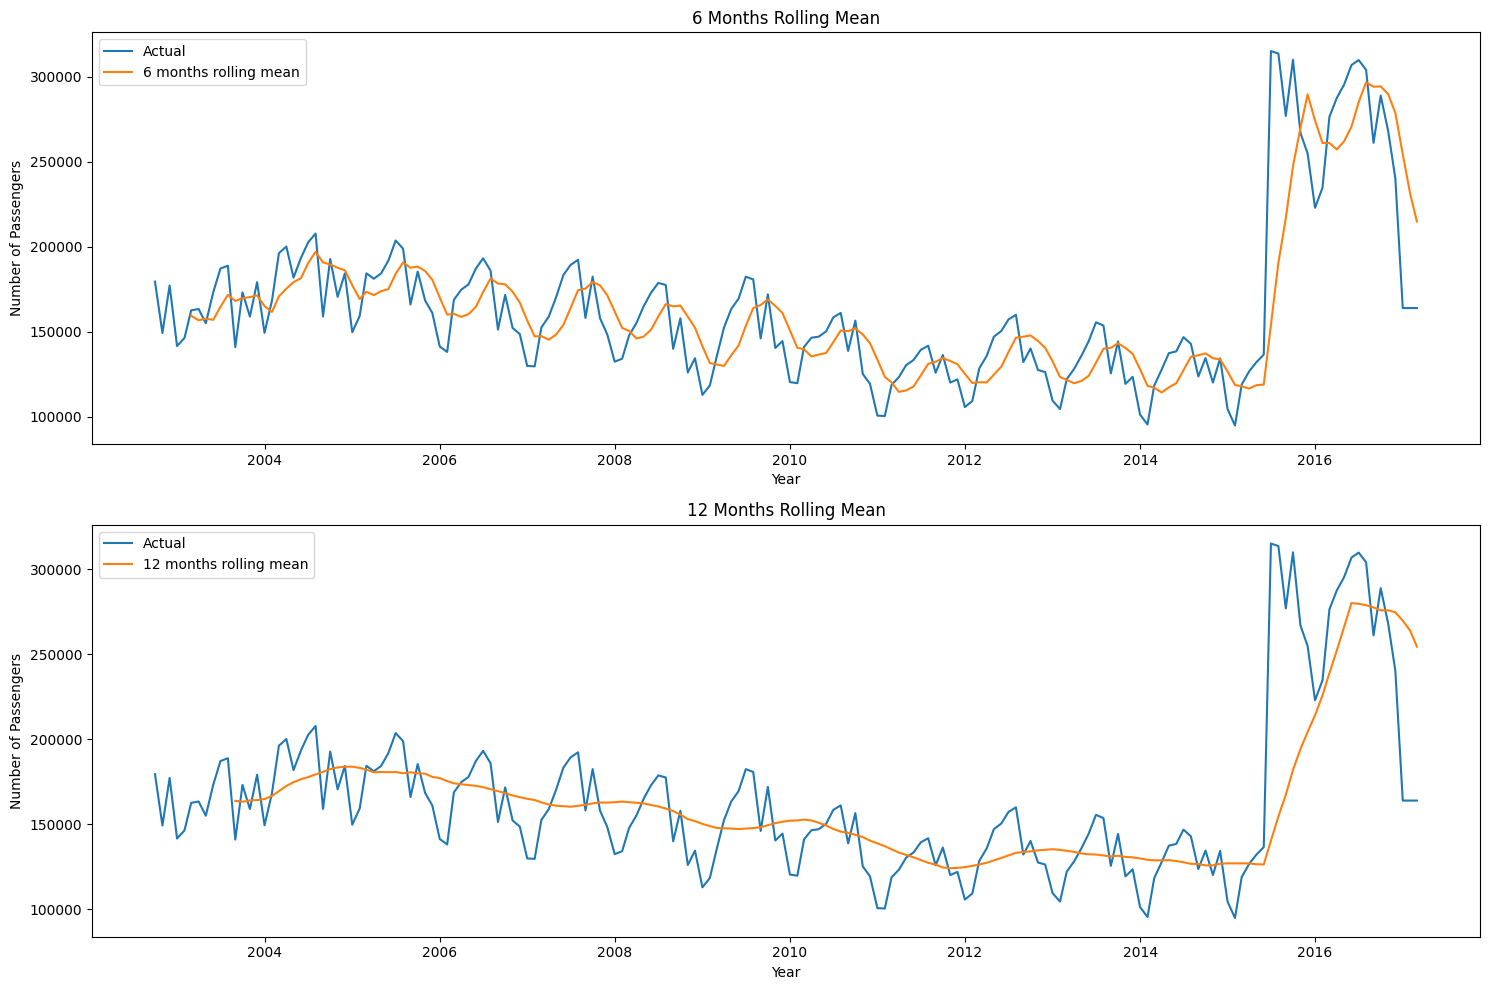

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 6-month rolling mean
axes[0].plot(passenger.index, passengers_count, label='Actual')
axes[0].plot(passenger.index, passengers_count.rolling(window=6).mean(), label='6 months rolling mean')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Passengers')
axes[0].set_title('6 Months Rolling Mean')
axes[0].legend(loc='best')

# Plot 12-month rolling mean
axes[1].plot(passenger.index, passengers_count, label='Actual')
axes[1].plot(passenger.index, passengers_count.rolling(window=12).mean(), label='12 months rolling mean')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Passengers')
axes[1].set_title('12 Months Rolling Mean')
axes[1].legend(loc='best')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The image presents two time series plots showing the number of passengers over several years, with rolling mean trends for 6 months and 12 months. The blue lines represent actual passenger numbers, while the orange lines show the smoothed trends. Both plots reveal seasonal fluctuations and a significant rise in passenger numbers around 2015, followed by a sharp decline towards 2017.

### Creating Monthly Passenger Pivot Table

This code utilizes the `pd.pivot_table()` function from the Pandas library to create a pivot table named 'monthly'. The pivot table aggregates the 'Passengers' data from the 'passenger' DataFrame based on the month and year. The resulting pivot table provides a structured view of the passenger count data, with months as rows and years as columns. The `reindex()` method is used to reorder the rows of the pivot table based on the chronological order of months. This organization facilitates the analysis and comparison of passenger counts across different months and years. The resulting 'monthly' pivot table serves as a useful tool for exploring and visualizing seasonal patterns in passenger travel.


In [28]:
monthly = pd.pivot_table(data=passenger,values='Passengers',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
monthly

Year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Month,,,,,,,,,,,,,,,,
Jan,NaN,141503.0,149265.0,149666.0,141231.0,129798.0,132305.0,112756.0,120295.0,100529.0,105583.0,109336.0,101137.0,104366.0,222896.0,163863.210526
Feb,NaN,146272.0,168209.0,159186.0,138028.0,129533.0,134025.0,118289.0,119637.0,100309.0,109105.0,104409.0,95304.0,94721.0,234656.0,163863.210526
Mar,NaN,162515.0,196159.0,184319.0,168710.0,152441.0,147740.0,134963.0,141017.0,118635.0,128372.0,121986.0,118208.0,118822.0,276472.0,163863.210526
Apr,NaN,163321.0,200104.0,181136.0,174727.0,158865.0,155157.0,152348.0,146410.0,123217.0,135661.0,128110.0,127635.0,126546.0,287663.0,NaN
May,NaN,154944.0,181802.0,184181.0,177790.0,170067.0,164984.0,163279.0,147006.0,130278.0,147019.0,135707.0,137300.0,131959.0,295368.0,NaN
Jun,NaN,173136.0,193367.0,191881.0,187211.0,183317.0,172983.0,169442.0,150143.0,133327.0,150355.0,144493.0,138354.0,136436.0,306910.0,NaN
Jul,NaN,187120.0,202529.0,203629.0,193162.0,189288.0,178680.0,182361.0,158368.0,139248.0,157167.0,155464.0,146748.0,315186.0,309891.0,NaN
Aug,NaN,188808.0,207762.0,198857.0,185869.0,192276.0,177441.0,180704.0,161006.0,141689.0,159881.0,153573.0,142784.0,313722.0,304137.0,NaN
Sep,NaN,140884.0,158918.0,165947.0,151212.0,158033.0,139855.0,145982.0,138631.0,125752.0,132063.0,125387.0,123581.0,277007.0,261125.0,NaN


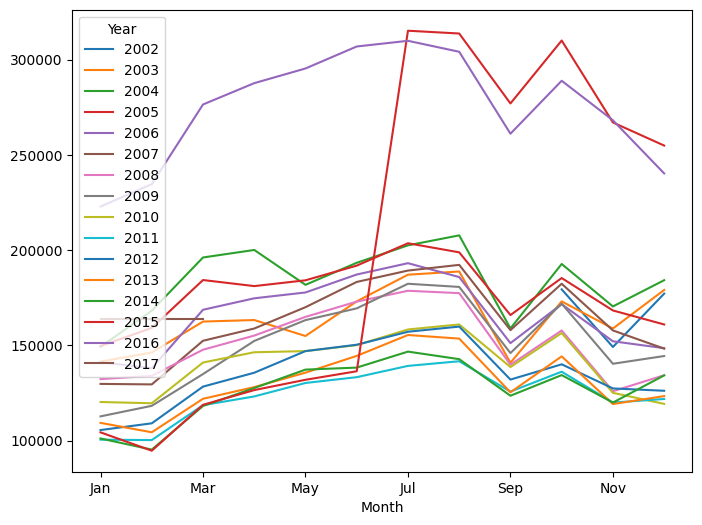

In [29]:
monthly.plot(figsize=(8,6))
plt.show()

### Creating Yearly Passenger Pivot Table

This code constructs a pivot table named 'yearly' using the `pd.pivot_table()` function from the Pandas library. It aggregates the 'Passengers' data from the 'passenger' DataFrame based on the year and month. The resulting pivot table organizes the passenger count data with years as rows and months as columns. By specifying the order of months in the columns, it ensures consistent column arrangement across all years. This pivot table structure facilitates the comparison of passenger counts across different months within each year. The resulting 'yearly' pivot table is valuable for analyzing seasonal variations and trends in p


In [30]:
yearly = pd.pivot_table(data=passenger,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
yearly

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179414.0,149184.0,177178.0
2003,141503.000000,146272.000000,162515.000000,163321.0,154944.0,173136.0,187120.0,188808.0,140884.0,173090.0,158868.0,179111.0
2004,149265.000000,168209.000000,196159.000000,200104.0,181802.0,193367.0,202529.0,207762.0,158918.0,192742.0,170464.0,184232.0
2005,149666.000000,159186.000000,184319.000000,181136.0,184181.0,191881.0,203629.0,198857.0,165947.0,185362.0,168339.0,160993.0
2006,141231.000000,138028.000000,168710.000000,174727.0,177790.0,187211.0,193162.0,185869.0,151212.0,171630.0,152161.0,148553.0
2007,129798.000000,129533.000000,152441.000000,158865.0,170067.0,183317.0,189288.0,192276.0,158033.0,182380.0,157857.0,148313.0
2008,132305.000000,134025.000000,147740.000000,155157.0,164984.0,172983.0,178680.0,177441.0,139855.0,157836.0,125929.0,134352.0
2009,112756.000000,118289.000000,134963.000000,152348.0,163279.0,169442.0,182361.0,180704.0,145982.0,171912.0,140372.0,144428.0
2010,120295.000000,119637.000000,141017.000000,146410.0,147006.0,150143.0,158368.0,161006.0,138631.0,156504.0,125108.0,119300.0


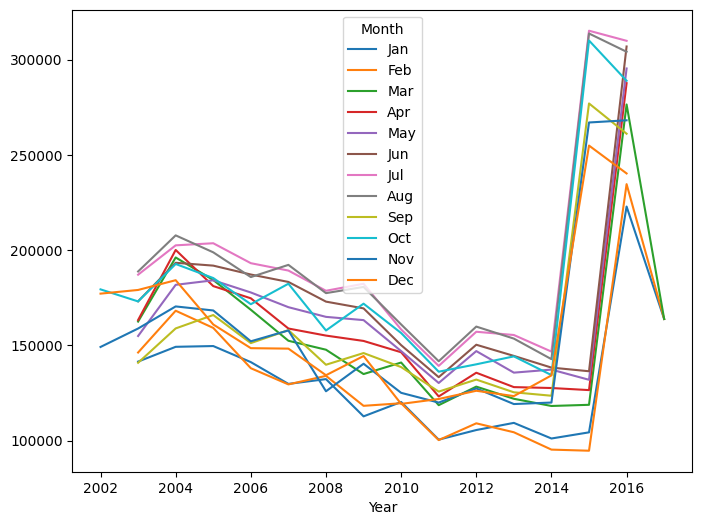

In [31]:
yearly.plot(figsize=(8,6))
plt.show()

### Augmented Dickey-Fuller Test

The `adfuller()` function from the `statsmodels` library performs the Augmented Dickey-Fuller (ADF) test, a statistical test used to determine whether a given time series is stationary or not. Stationarity implies that the statistical properties of the time series, such as mean and variance, remain constant over time.

The ADF test evaluates the null hypothesis that a unit root is present in a time series, indicating non-stationarity. If the p-value obtained from the test is less than a chosen significance level (commonly 0.05), the null hypothesis is rejected, suggesting that the time series is stationary. Conversely, a p-value greater than the significance level fails to reject the null hypothesis, indicating that the time series is non-stationary.

In this context, applying the ADF test to `passengers_count` helps assess whether the passenger count time series exhibits stationary behavior. If the p-value is sufficiently low, it suggests that the passenger count data is stationary, making it more amenable to time series analysis techniques such as forecasting and trend estimation.


In [32]:
adfuller(passengers_count)

(-3.527857312092633,
 0.007299826935341273,
 14,
 159,
 {'1%': -3.472161410886292,
  '5%': -2.8798954259680936,
  '10%': -2.5765565828092245},
 3581.1040258811527)

In [36]:
adfuller_results = pd.Series(adfuller(passengers_count)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(passengers_count)[4].items():
    adfuller_results['Critical Value'+' '+ key] = value
print(adfuller_results)

T stats                    -3.527857
p-value                     0.007300
lags used                  14.000000
Number of observations    159.000000
Critical Value 1%          -3.472161
Critical Value 5%          -2.879895
Critical Value 10%         -2.576557
dtype: float64


### Augmented Dickey-Fuller Test Results

The Augmented Dickey-Fuller (ADF) test statistic (T stats) obtained is -3.527857, indicating the strength of evidence against the null hypothesis of non-stationarity. A more negative value suggests stronger evidence against non-stationarity.

The p-value obtained from the test is 0.007300. Since this p-value is less than the common significance level of 0.05, we reject the null hypothesis of non-stationarity. This suggests that the passenger count time series is likely stationary.

The number of lags used in the test is 14.

There are 159 observations used in the test.

Critical values are also provided for different confidence levels: 1%, 5%, and 10%. These critical values help in interpreting the significance of the test statistic. In this case, since the absolute value of the test statistic is less than the critical values at the 1%, 5%, and 10% levels, we can reject the null hypothesis at these confidence levels, further supporting the evidence of stationarity in the passenger count time series.


### Defining SARIMA Model Parameters

This code defines the parameters for a Seasonal Autoregressive Integrated Moving Average (SARIMA) model. SARIMA is an extension of the ARIMA model that includes seasonal components. The parameters are:

- **p**: Represents the order of the autoregressive (AR) component, which captures the relationship between an observation and a number of lagged observations.
- **d**: Represents the order of differencing needed to make the time series stationary.
- **q**: Represents the order of the moving average (MA) component, which captures the relationship between an observation and the residual errors from a moving average model.

In this code, `range(0, 3)` is used to generate values from 0 to 2 for both `p` and `q`, allowing for any value between 0 and 2 for these parameters. The `d` parameter is set to 0 to indicate that only non-seasonal differencing is considered.

The `itertools.product()` function is then used to generate all possible combinations of `p`, `d`, and `q` values, resulting in a list of triplets representing different SARIMA model configurations. These configurations will be used for model selection and parameter tuning during the modeling process.


In [57]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(0,1)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2)]

### Defining Seasonal SARIMA Model Parameters

This code defines the parameters for the seasonal component of a Seasonal Autoregressive Integrated Moving Average (SARIMA) model. The seasonal component captures periodic patterns that occur over fixed intervals, such as monthly or yearly patterns in time series data.

The parameters defined are:

- **P**: Represents the seasonal autoregressive (SAR) component, which captures the relationship between an observation and a number of lagged observations at seasonal intervals.
- **D**: Represents the seasonal differencing order, which is similar to the non-seasonal differencing but applied over seasonal intervals.
- **Q**: Represents the seasonal moving average (SMA) component, which captures the relationship between an observation and the residual errors from a seasonal moving average model.

In this code, `range(0, 3)` is used to generate values from 0 to 2 for both `P` and `Q`, allowing for any value between 0 and 2 for these seasonal parameters. The `D` parameter is set to 0 to indicate that only non-seasonal differencing is considered.

The list comprehension `(x[0], x[1], x[2], 12)` generates all possible combinations of seasonal `P`, `D`, and `Q` values, with the seasonal period set to 12 (representing monthly data). This results in a list of quadruplets representing different seasonal SARIMA model configurations.


In [39]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,3)
P = Q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

### SARIMA Model Selection

This code iterates through all possible combinations of non-seasonal and seasonal SARIMA model parameters (`pdq` and `seasonal_pdq` respectively). For each combination, it attempts to fit a SARIMAX model using the `sm.tsa.statespace.SARIMAX()` function from the `statsmodels` library.

If the model fitting is successful, the Akaike Information Criterion (AIC) is computed using the fitted model (`results.aic`). The AIC is a metric used for model selection, where lower values indicate a better fitting model with good explanatory power and parsimony.

The code then compares the AIC of the current model with the best AIC found so far (`best_aic`). If the current model has a lower AIC, it updates the variables `best_aic`, `best_pdq`, and `best_seasonal_pdq` to store the parameters of the best-fitting model.

Any errors encountered during model fitting are caught and the loop continues to the next iteration.

Finally, the code prints the parameters of the best-fitting SARIMA model along with its AIC value.

This process helps in selecting the most suitable SARIMA model configuration for forecasting the passenger count time series data, balancing model complexity and goodness-of-fit.


In [42]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:

        try:
            temp_model = sm.tsa.statespace.SARIMAX(passengers_count,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

           # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 0, 2)x(1, 2, 2, 12)12 model - AIC:2848.875340078023


### Best SARIMAX Model Selection

The best-fitting SARIMAX model identified is SARIMAX(1, 0, 2)x(1, 2, 2, 12) with an AIC value of 2848.88. This model configuration includes an autoregressive order of 1, moving average order of 2, and seasonal autoregressive and moving average orders of 1 and 2 respectively, with a seasonal period of 12 (representing monthly data). The Akaike Information Criterion (AIC) of 2848.88 indicates that this model provides a good balance between goodness-of-fit and model complexity compared to other candidate models tested. This SARIMAX model captures both non-seasonal and seasonal components of the passenger count time series data, making it suitable for forecasting future passenger counts while considering underlying patterns and variations.


### SARIMAX Model Fitting and Summary

This code utilizes the `sm.tsa.statespace.SARIMAX()` function from the `statsmodels` library to fit a SARIMAX model to the passenger count time series data (`passengers_count`). The specified model configuration includes an autoregressive order of 1, moving average order of 2 for the non-seasonal component, and seasonal autoregressive and moving average orders of 1 and 2 respectively, with a seasonal period of 12 (representing monthly data).

The `enforce_invertibility=False` and `enforce_stationarity=False` parameters are used to prevent enforcing invertibility and stationarity constraints on the model, allowing for more flexible modeling.

Once the model is fitted using the `fit()` method, the `summary()` function is called to display a summary of the model results. This summary provides detailed information about the SARIMAX model, including parameter estimates, standard errors, p-values, and diagnostic statistics such as AIC and BIC. It also includes diagnostic tests for model adequacy, such as the Ljung-Box test for autocorrelation of residuals.

This summary is helpful for evaluating the adequacy and effectiveness of the SARIMAX model in capturing the underlying patterns and variations in the passenger c


In [43]:
sarima = sm.tsa.statespace.SARIMAX(passengers_count,order=(1,0,2),seasonal_order=(1,2,2,12),enforce_invertibility=False,enforce_stationarity=False)
sarima_results = sarima.fit()
print(sarima_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  174
Model:             SARIMAX(1, 0, 2)x(1, 2, 2, 12)   Log Likelihood               -1417.438
Date:                            Fri, 24 May 2024   AIC                           2848.875
Time:                                    23:04:23   BIC                           2868.561
Sample:                                10-01-2002   HQIC                          2856.871
                                     - 03-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9527      0.110      8.629      0.000       0.736       1.169
ma.L1         -0.0280      0.385   

### SARIMAX Model Results

The SARIMAX(1, 0, 2)x(1, 2, 2, 12) model was fitted to the passenger count time series data. Key findings from the model summary include: a log likelihood of -1417.438, indicating how well the model explains the data; an AIC value of 2848.875, a measure of goodness-of-fit and model complexity; and a BIC value of 2868.561, another measure of model fit penalizing complexity. Parameter coefficients are provided for the autoregressive (ar) and moving average (ma) components, as well as for the seasonal components (ar.S and ma.S). The Ljung-Box test suggests no significant autocorrelation in the residuals, while the Jarque-Bera test indicates non-normality in the residuals. Heteroskedasticity is detected in the residuals. Additionally, warnings are issued regarding potential instability in standard errors due to singularity or near-singularity of the covariance matrix. These results offer insights into the model's adequacy in capturing underlying patterns in the passenger count time series data, guiding further analysis or refinement.


### Passenger Count Forecast Plot

This code generates a forecast plot for passenger counts using the SARIMAX model results. First, a forecast with 36 steps ahead is obtained using the `get_forecast()` method from the SARIMAX results. The forecasted values and confidence intervals are extracted from the forecast object.

Next, Matplotlib is used to plot the actual passenger counts against the forecasted values. The actual passenger counts are plotted as a solid line, while the forecasted values are plotted as a red line. Additionally, confidence intervals are shaded in pink to indicate the uncertainty in the forecast.

The resulting plot provides a visual representation of the forecasted passenger counts over time, along with the associated uncertainty. This aids in understanding the potential future trajectory of passenger counts and assessing the reliability of the forecast.


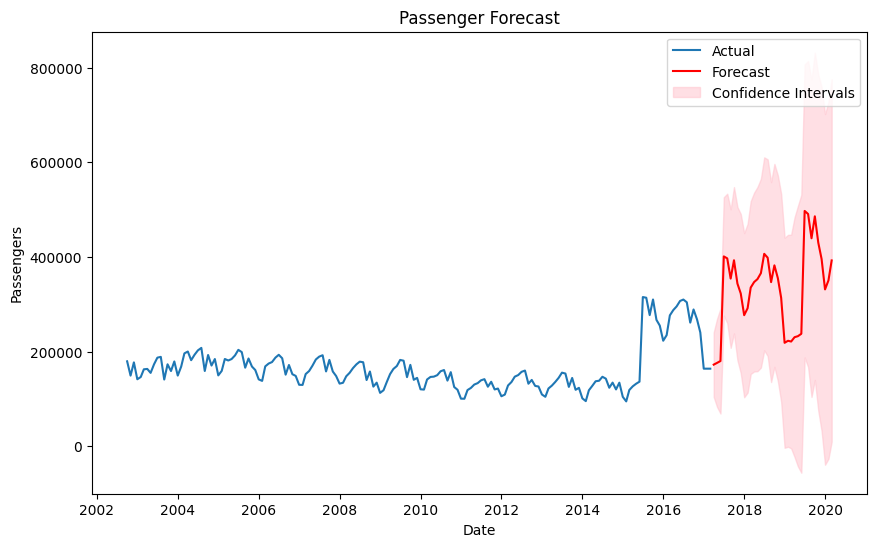

In [56]:
forecast_steps = 36
forecast = sarima_results.get_forecast(steps=forecast_steps)

# Extracting forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plotting forecasted values and confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(passenger.index, passenger['Passengers'], label='Actual')
plt.plot(pd.date_range(start=passenger.index[-1], periods=forecast_steps+1, freq='MS')[1:], forecast_values, color='red', label='Forecast')
plt.fill_between(pd.date_range(start=passenger.index[-1], periods=forecast_steps+1, freq='MS')[1:],
                 confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.5, label='Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Passenger Forecast')
plt.legend()
plt.show()

The chart titled **"Passenger Forecast"** displays a time series of passenger data from 2002 to 2020.

- The **blue line** represents the actual number of passengers up to around 2016.
- The **red line** indicates the forecasted passenger numbers, with the surrounding shaded area representing the confidence intervals of the forecast.

The forecast shows a significant increase in passenger numbers starting around 2016, with substantial fluctuations and wider confidence intervals, suggesting increased uncertainty in the predictions.
